In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
ipor_df = pd.read_csv("/lpor_classification.csv")
ipor_df.head()

,Escola,Sexo,idade,TP_Moradia,Tamanho_Familia,Situacao_Pais,Educacao_Mae,Educacao_Pai,Trabalho_Mae,Trabalho_Pai,...,Esta_Namorando,Boa_Convivencia_Familia,Tempo_Livre_Apos_Escola,Tempo_com_Amigos,Alcool_Dia_Util,Alcool_Fim_Semana,Estado_Saude,Falta_Escolar,Nota_1Semestre,Nota_2Semestre
0,0,1,18,0,1,1,4,4,3,0,...,0,4,3,4,1,1,3,4,0,11
1,0,1,17,0,1,0,1,1,3,4,...,0,5,3,3,1,1,3,2,9,11
2,0,1,15,0,0,0,1,1,3,4,...,0,4,3,2,2,3,3,6,12,13
3,0,1,15,0,1,0,4,2,1,2,...,1,3,2,2,1,1,5,0,14,14
4,0,1,16,0,1,0,3,3,4,4,...,0,4,3,2,1,2,5,0,11,13


In [ ]:
ipor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Escola                   649 non-null    int64
 1   Sexo                     649 non-null    int64
 2   idade                    649 non-null    int64
 3   TP_Moradia               649 non-null    int64
 4   Tamanho_Familia          649 non-null    int64
 5   Situacao_Pais            649 non-null    int64
 6   Educacao_Mae             649 non-null    int64
 7   Educacao_Pai             649 non-null    int64
 8   Trabalho_Mae             649 non-null    int64
 9   Trabalho_Pai             649 non-null    int64
 10  Motivo_Escolha_Escolar   649 non-null    int64
 11  Responsavel_Legal        649 non-null    int64
 12  Tempo_ida_Escola         649 non-null    int64
 13  Tempo_Estudo_Semanal     649 non-null    int64
 14  Apoio_Educacao_Extra     649 non-null    int64
 15  Apoio_

In [ ]:
ipor_df.isnull().sum()

Escola                     0
Sexo                       0
idade                      0
TP_Moradia                 0
Tamanho_Familia            0
Situacao_Pais              0
Educacao_Mae               0
Educacao_Pai               0
Trabalho_Mae               0
Trabalho_Pai               0
Motivo_Escolha_Escolar     0
Responsavel_Legal          0
Tempo_ida_Escola           0
Tempo_Estudo_Semanal       0
Apoio_Educacao_Extra       0
Apoio_Educacao_Pais        0
Aulas_Particulares         0
Ativ_Extracurricular       0
Frequentou_Creche          0
Quer_Fazer_Graduacao       0
Tem_Internet               0
Esta_Namorando             0
Boa_Convivencia_Familia    0
Tempo_Livre_Apos_Escola    0
Tempo_com_Amigos           0
Alcool_Dia_Util            0
Alcool_Fim_Semana          0
Estado_Saude               0
Falta_Escolar              0
Nota_1Semestre             0
Nota_2Semestre             0
dtype: int64

In [ ]:
ipor_df.drop(['Escola', 'TP_Moradia'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(ipor_df)
ipor_df_preprocessed = pd.DataFrame(data=X, columns=ipor_df.columns)
ipor_df_preprocessed.head(10)

,Sexo,idade,Tamanho_Familia,Situacao_Pais,Educacao_Mae,Educacao_Pai,Trabalho_Mae,Trabalho_Pai,Motivo_Escolha_Escolar,Responsavel_Legal,...,Esta_Namorando,Boa_Convivencia_Familia,Tempo_Livre_Apos_Escola,Tempo_com_Amigos,Alcool_Dia_Util,Alcool_Fim_Semana,Estado_Saude,Falta_Escolar,Nota_1Semestre,Nota_2Semestre
0,0.833377,1.031695,0.648175,2.666927,1.310216,1.540715,0.217265,-2.504036,0.590738,-0.605743,...,-0.763496,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-0.371042,0.073433,-4.155470,-0.195820
1,0.833377,0.210137,0.648175,-0.374963,-1.336039,-1.188832,0.217265,0.780692,0.590738,1.067138,...,-0.763496,1.119748,-0.171647,-0.157380,-0.543555,-0.997695,-0.371042,-0.357863,-0.874570,-0.195820
2,0.833377,-1.432980,-1.542792,-0.374963,-1.336039,-1.188832,0.217265,0.780692,1.629733,-0.605743,...,-0.763496,0.072606,-0.171647,-1.008546,0.538553,0.560678,-0.371042,0.504730,0.219064,0.491137
3,0.833377,-1.432980,0.648175,-0.374963,1.310216,-0.278983,-1.266997,-0.861672,-1.487251,-0.605743,...,1.309764,-0.974536,-1.123771,-1.008546,-0.543555,-0.997695,1.012903,-0.789159,0.948153,0.834615
4,0.833377,-0.611422,0.648175,-0.374963,0.428131,0.630866,0.959395,0.780692,-1.487251,1.067138,...,-0.763496,0.072606,-0.171647,-1.008546,-0.543555,-0.218508,1.012903,-0.789159,-0.145481,0.491137
5,-1.199937,-0.611422,-1.542792,-0.374963,1.310216,0.630866,-0.524866,0.780692,-0.448257,-0.605743,...,-0.763496,1.119748,0.780478,-1.008546,-0.543555,-0.218508,1.012903,0.504730,0.219064,0.147659
6,-1.199937,-0.611422,-1.542792,-0.374963,-0.453954,-0.278983,0.959395,0.780692,-1.487251,-0.605743,...,-0.763496,0.072606,0.780478,0.693785,-0.543555,-0.997695,-0.371042,-0.789159,0.583608,0.147659
7,0.833377,0.210137,0.648175,2.666927,1.310216,1.540715,0.959395,-2.504036,-1.487251,-0.605743,...,-0.763496,0.072606,-2.075896,0.693785,-0.543555,-0.997695,-1.754987,-0.357863,-0.510025,0.491137
8,-1.199937,-1.432980,-1.542792,2.666927,0.428131,-0.278983,-0.524866,0.780692,-1.487251,-0.605743,...,-0.763496,0.072606,-1.123771,-1.008546,-0.543555,-0.997695,-1.754987,-0.789159,1.312697,1.521571
9,-1.199937,-1.432980,0.648175,-0.374963,0.428131,1.540715,0.959395,0.780692,-1.487251,-0.605743,...,-0.763496,1.119748,1.732603,-1.859711,-0.543555,-0.997695,1.012903,-0.789159,0.219064,0.147659


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
dfx_pca = pca.fit(ipor_df_preprocessed)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)

# Fit PCA
X_pca = pca.fit_transform(ipor_df_preprocessed)


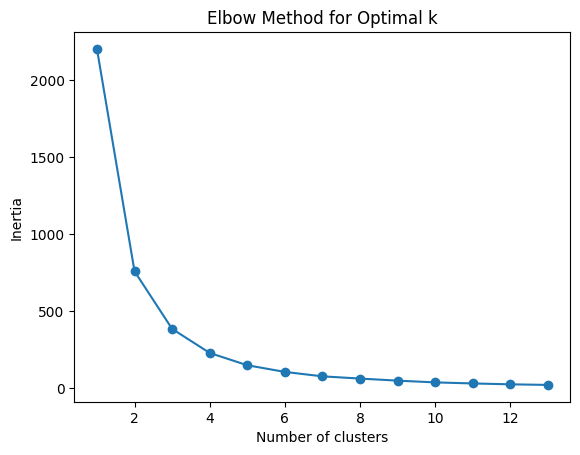

In [ ]:
inertia = []
for k in range(1, 14):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_pca)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 14), inertia, marker="o")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
print(X_pca.shape)

(649, 1)


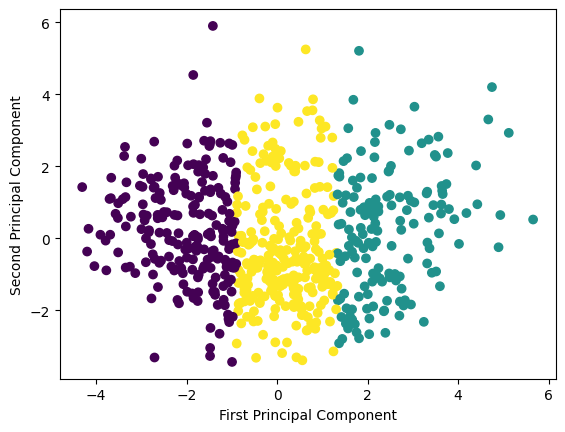

In [ ]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(ipor_df_preprocessed)

# Now X_2d should have shape (n_samples, 2)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()
